In [2]:
from keras.applications import VGG16

Using TensorFlow backend.


In [3]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'D:/data/small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size =20

def extract_features(directory, sample_count):
    '''
    use pre-trained network to obtain features from images
    features can be passed into classifier
    '''
    
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
        
    for inputs_batch, labels_batch in generator:

        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features, labels
    

In [6]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [9]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 9s 5ms/step - loss: 0.5886 - acc: 0.6775 - val_loss: 0.4429 - val_acc: 0.8380
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4256 - acc: 0.8115 - val_loss: 0.3634 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3632 - acc: 0.8430 - val_loss: 0.3312 - val_acc: 0.8630
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3163 - acc: 0.8670 - val_loss: 0.2999 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2731 - acc: 0.8920 - val_loss: 0.2802 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2636 - acc: 0.9050 - val_loss: 0.2702 - v

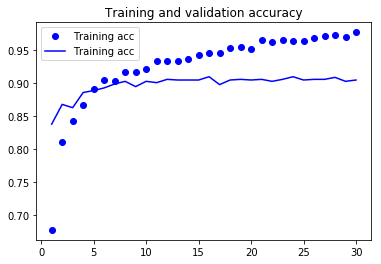

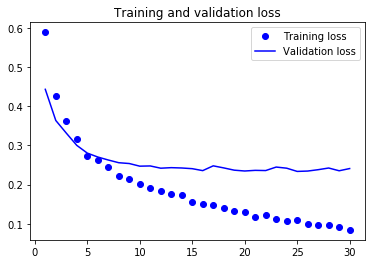

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_base.trainable = False

In [18]:

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

Found 2000 images belonging to 2 classes.


In [21]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [25]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc']
            )

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 629s 6s/step - loss: 0.5936 - acc: 0.6765 - val_loss: 0.4601 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 636s 6s/step - loss: 0.4819 - acc: 0.7885 - val_loss: 0.3878 - val_acc: 0.8400
Epoch 3/30
100/100 [==============================] - 636s 6s/step - loss: 0.4466 - acc: 0.7920 - val_loss: 0.3427 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 647s 6s/step - loss: 0.4135 - acc: 0.8160 - val_loss: 0.3130 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 619s 6s/step - loss: 0.3899 - acc: 0.8300 - val_loss: 0.3011 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 627s 6s/step - loss: 0.3764 - acc: 0.8350 - val_loss: 0.2847 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 643s 6s/step - loss: 0.3465 - acc: 0.8485 - val_loss: 0.2756 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 638s 6s/step - 

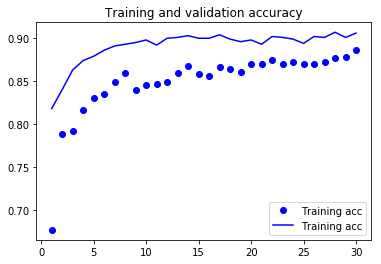

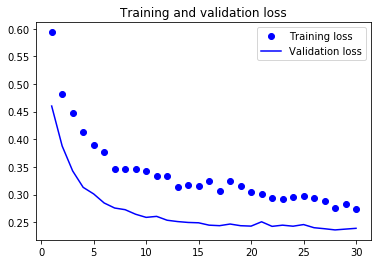

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()